# EDA Analysis on Stackoverflow Survey Dataset (2019)
## By:Usman Nasir
### Contact ; Email: usmankhanuuu52@gmail.com
###             Linkdein: https://www.linkedin.com/in/usman-nasir-2690821b2/
###                Github: https://github.com/usmanuuu52
###               Kaggle: https://www.kaggle.com/usmani52

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('survey_results_public_2019.csv')

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
schema_df=pd.read_csv('survey_results_schema_2019.csv',index_col=0).QuestionText

In [5]:
schema_df.head(20)

Column
Respondent        Randomized respondent ID number (not in order ...
MainBranch        Which of the following options best describes ...
Hobbyist                                    Do you code as a hobby?
OpenSourcer             How often do you contribute to open source?
OpenSource        How do you feel about the quality of open sour...
Employment        Which of the following best describes your cur...
Country                   In which country do you currently reside?
Student           Are you currently enrolled in a formal, degree...
EdLevel           Which of the following best describes the high...
UndergradMajor    What was your main or most important field of ...
EduOther          Which of the following types of non-degree edu...
OrgSize           Approximately how many people are employed by ...
DevType           Which of the following describe you? Please se...
YearsCode         Including any education, how many years have y...
Age1stCode        At what age did you wri

In [69]:
for i in schema_df.loc[:]:
    print(i)


Randomized respondent ID number (not in order of survey response time)
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
Do you code as a hobby?
How often do you contribute to open source?
How do you feel about the quality of open source software (OSS)?
Which of the following best describes your current employment status?
In which country do you currently reside?
Are you currently enrolled in a formal, degree-granting college or university program?
Which of the following best describes the highest level of formal education that you’ve completed?
What was your main or most important field of study?
Which of the following types of non-degree education have you used or participated in? Please select all that apply.
Approximately how many people are employed by the company or organization you work for?
Which of the following describe you? Please select all that apply.
Including any education, how many years have you been coding

In [7]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [8]:
df.shape

(88883, 85)

In [125]:
df.describe().agg(['count','mean','std','min','25%']).rename({'count':'Total Entries'})

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Total Entries,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000
mean,47649.182041,1.259234e+15,331268.817783,8694.770601,6238.949780,9929.689386
std,32033.558438,3.531896e+15,679921.205700,22612.814291,17597.313344,27993.488269
min,1.000000,0.000000e+00,0.000000,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,25777.500000,40.000000,2.000000,24.000000


In [10]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [11]:
# select columns which you need for your peoject
df_col=df[['Country','Age','EdLevel','Gender','WorkLoc','UndergradMajor','Hobbyist','Age1stCode','YearsCode','YearsCodePro',
         'LanguageWorkedWith','LanguageDesireNextYear','Employment','DevType',
        'WorkWeekHrs','JobSat','JobFactors','ConvertedComp','SocialMedia','Student']]

In [12]:
df_col.head()

,Country,Age,EdLevel,Gender,WorkLoc,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,ConvertedComp,SocialMedia,Student
0,United Kingdom,14.0,Primary/elementary school,Man,NaN,NaN,Yes,10,4,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Twitter,No
1,Bosnia and Herzegovina,19.0,"Secondary school (e.g. American high school, G...",Man,NaN,NaN,No,17,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,Financial performance or funding status of the...,NaN,Instagram,"Yes, full-time"
2,Thailand,28.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Man,Home,Web development or web design,Yes,22,3,1,HTML/CSS,Elixir;HTML/CSS,Employed full-time,"Designer;Developer, back-end;Developer, front-...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",8820.0,Reddit,No
3,United States,22.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Man,Home,"Computer science, computer engineering, or sof...",No,16,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",80.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",61000.0,Reddit,No
4,Ukraine,30.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Man,Office,"Computer science, computer engineering, or sof...",Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",55.0,Slightly dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN,Facebook,No


In [13]:
df_col.shape

(88883, 20)

In [14]:
schema_selected=schema_df.loc[['Country','Age','EdLevel','Gender','WorkLoc','UndergradMajor','Hobbyist','Age1stCode','YearsCode','YearsCodePro',
         'LanguageWorkedWith','LanguageDesireNextYear','Employment','DevType',
        'WorkWeekHrs','JobSat','JobFactors','ConvertedComp','SocialMedia','Student']]

In [15]:
schema_selected[1:].values

array(['What is your age (in years)? If you prefer not to answer, you may leave this question blank.',
       'Which of the following best describes the highest level of formal education that you’ve completed?',
       'Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank.',
       'Where would you prefer to work?',
       'What was your main or most important field of study?',
       'Do you code as a hobby?',
       'At what age did you write your first line of code or program? (E.g., webpage, Hello World, Scratch project)',
       'Including any education, how many years have you been coding?',
       'How many years have you coded professionally (as a part of your work)?',
       'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with th

In [16]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 88751 non-null  object 
 1   Age                     79210 non-null  float64
 2   EdLevel                 86390 non-null  object 
 3   Gender                  85406 non-null  object 
 4   WorkLoc                 70055 non-null  object 
 5   UndergradMajor          75614 non-null  object 
 6   Hobbyist                88883 non-null  object 
 7   Age1stCode              87634 non-null  object 
 8   YearsCode               87938 non-null  object 
 9   YearsCodePro            74331 non-null  object 
 10  LanguageWorkedWith      87569 non-null  object 
 11  LanguageDesireNextYear  84088 non-null  object 
 12  Employment              87181 non-null  object 
 13  DevType                 81335 non-null  object 
 14  WorkWeekHrs             64503 non-null

In [17]:
df_col['Age1stCode']=pd.to_numeric(df_col['Age1stCode'],errors='coerce')
df_col['YearsCodePro']=pd.to_numeric(df_col['YearsCodePro'],errors='coerce')
df_col['YearsCode']=pd.to_numeric(df_col['YearsCode'],errors='coerce')

C:\Users\usman\AppData\Local\Temp\ipykernel_6912\2254281023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Age1stCode']=pd.to_numeric(df_col['Age1stCode'],errors='coerce')
C:\Users\usman\AppData\Local\Temp\ipykernel_6912\2254281023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['YearsCodePro']=pd.to_numeric(df_col['YearsCodePro'],errors='coerce')
C:\Users\usman\AppData\Local\Temp\ipykernel_6912\2254281023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [18]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 88751 non-null  object 
 1   Age                     79210 non-null  float64
 2   EdLevel                 86390 non-null  object 
 3   Gender                  85406 non-null  object 
 4   WorkLoc                 70055 non-null  object 
 5   UndergradMajor          75614 non-null  object 
 6   Hobbyist                88883 non-null  object 
 7   Age1stCode              87088 non-null  float64
 8   YearsCode               86445 non-null  float64
 9   YearsCodePro            70285 non-null  float64
 10  LanguageWorkedWith      87569 non-null  object 
 11  LanguageDesireNextYear  84088 non-null  object 
 12  Employment              87181 non-null  object 
 13  DevType                 81335 non-null  object 
 14  WorkWeekHrs             64503 non-null

In [19]:
#checking for num values
df_col.isnull().sum()

Country                     132
Age                        9673
EdLevel                    2493
Gender                     3477
WorkLoc                   18828
UndergradMajor            13269
Hobbyist                      0
Age1stCode                 1795
YearsCode                  2438
YearsCodePro              18598
LanguageWorkedWith         1314
LanguageDesireNextYear     4795
Employment                 1702
DevType                    7548
WorkWeekHrs               24380
JobSat                    17895
JobFactors                 9512
ConvertedComp             33060
SocialMedia                4446
Student                    1869
dtype: int64

In [20]:
df_col['Hobbyist'].value_counts()

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [21]:
df_col.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,79210.000000,87088.000000,86445.000000,70285.000000,64503.000000,5.582300e+04
mean,30.336699,15.456446,11.789195,8.590311,42.127197,1.271107e+05
std,9.178390,4.993287,8.988751,7.533009,37.287610,2.841523e+05
min,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,5.000000,3.000000,40.000000,2.577750e+04
50%,29.000000,15.000000,9.000000,6.000000,40.000000,5.728700e+04
75%,35.000000,18.000000,16.000000,12.000000,44.750000,1.000000e+05
max,99.000000,84.000000,50.000000,50.000000,4850.000000,2.000000e+06


In [22]:
(df_col['Age']<10).value_counts()

False    88849
True        34
Name: Age, dtype: int64

In [23]:
df_col[df_col['Age']<10].index

Int64Index([  719,  4818,  9613, 11799, 11887, 12161, 16212, 28514, 29354,
            30591, 38160, 41250, 45721, 49469, 50388, 55936, 60628, 61329,
            62752, 64067, 67762, 67914, 70002, 71484, 78834, 81706, 82915,
            84141, 84776, 86044, 88448, 88509, 88698, 88779],
           dtype='int64')

In [24]:
df_col.drop(df_col[df_col['Age']<10].index,inplace=True)

C:\Users\usman\AppData\Local\Temp\ipykernel_6912\1216370893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col.drop(df_col[df_col['Age']<10].index,inplace=True)


In [25]:
(df_col['Age']<10).value_counts()

False    88849
Name: Age, dtype: int64

In [26]:
df_col.drop(df_col[df_col['WorkWeekHrs']>140].index,inplace=True)

C:\Users\usman\AppData\Local\Temp\ipykernel_6912\618346415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col.drop(df_col[df_col['WorkWeekHrs']>140].index,inplace=True)


In [27]:
df_col.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
count,78753.000000,86612.000000,85973.000000,69837.000000,64033.000000,5.541400e+04
mean,30.348125,15.458632,11.791307,8.597749,40.358504,1.273205e+05
std,9.165648,4.989112,8.996051,7.538414,10.123660,2.845834e+05
min,10.000000,5.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,24.000000,12.000000,5.000000,3.000000,40.000000,2.583600e+04
50%,29.000000,15.000000,9.000000,6.000000,40.000000,5.728700e+04
75%,35.000000,18.000000,16.000000,12.000000,44.000000,1.000000e+05
max,99.000000,84.000000,50.000000,50.000000,140.000000,2.000000e+06


In [28]:
df_col['Gender'].value_counts()

Man                                                            77488
Woman                                                           6319
Non-binary, genderqueer, or gender non-conforming                592
Man;Non-binary, genderqueer, or gender non-conforming            180
Woman;Non-binary, genderqueer, or gender non-conforming          161
Woman;Man                                                        130
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [29]:
# df_col.where(~(df_col.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [30]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(9,5)
plt.rcParams['figure.facecolor']='#00000000'

In [31]:
df_col['Country'].nunique()

179

In [32]:
top_15=df_col['Country'].value_counts().head(15)

In [33]:
top_15

United States         20936
India                  9046
Germany                5843
United Kingdom         5732
Canada                 3391
France                 2382
Brazil                 1934
Australia              1902
Poland                 1867
Netherlands            1850
Russian Federation     1686
Spain                  1598
Italy                  1572
Sweden                 1258
Switzerland             975
Name: Country, dtype: int64

C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


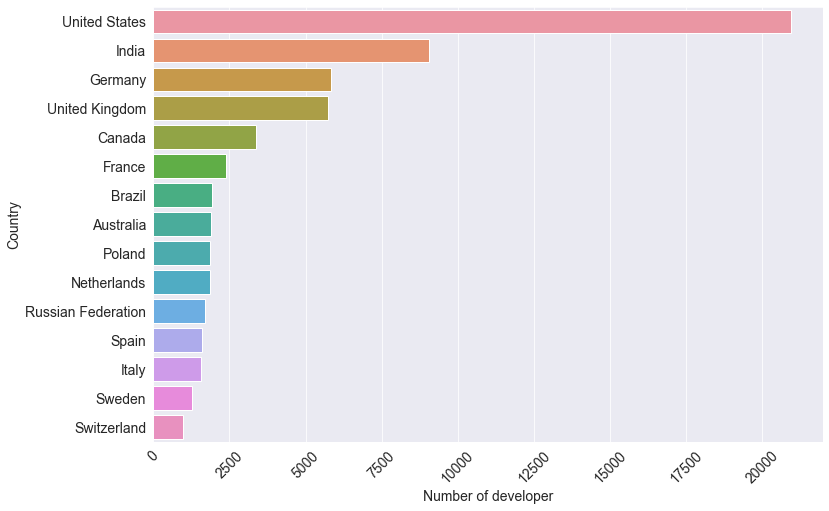

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(top_15,top_15.index)

plt.xticks(rotation=45)
plt.xlabel("Number of developer")
plt.ylabel('Country')
plt.show()

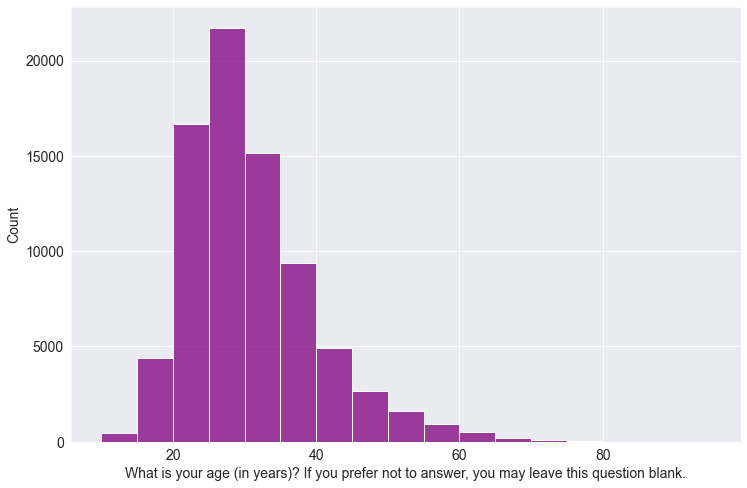

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df_col.Age,bins=np.arange(10,100,5),color='purple')


plt.xlabel(schema_df.Age)

plt.show()

In [76]:
gen_coun=df_col['Gender'].value_counts()
gen_coun

Man                                                            77488
Woman                                                           6319
Non-binary, genderqueer, or gender non-conforming                592
Man;Non-binary, genderqueer, or gender non-conforming            180
Woman;Non-binary, genderqueer, or gender non-conforming          161
Woman;Man                                                        130
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [95]:
values=['Man','Woman','Non-binary, genderqueer, or gender non-conforming']
gen_coun=gen_coun[0:3]

In [96]:
gen_coun.dtype

dtype('int64')

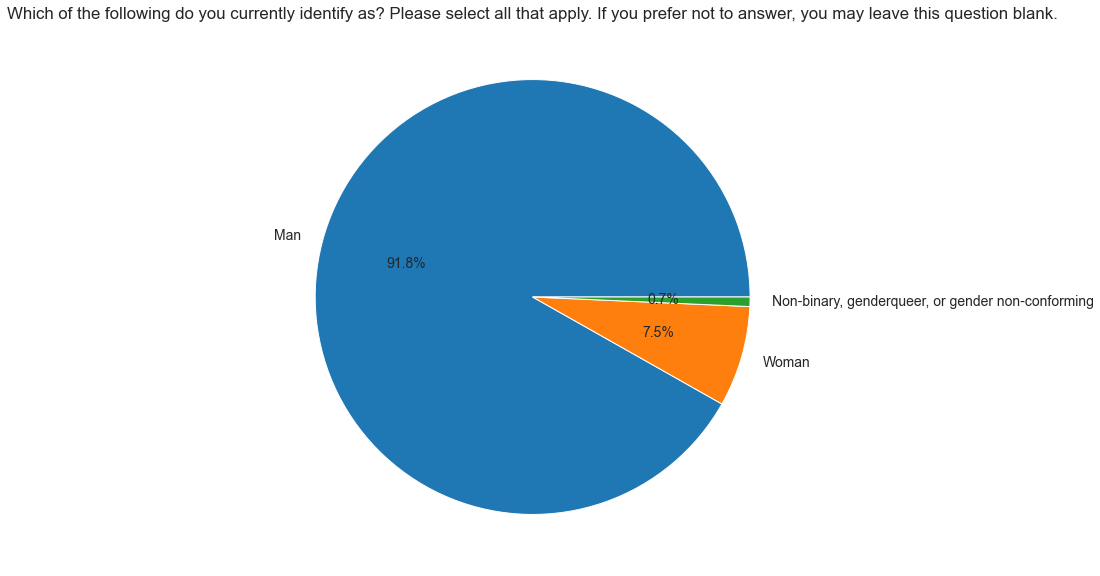

In [97]:
plt.figure(figsize=(20,10))
plt.pie(gen_coun,labels=gen_coun.index,autopct="%0.1f%%")


plt.title(schema_df.Gender)

plt.show()

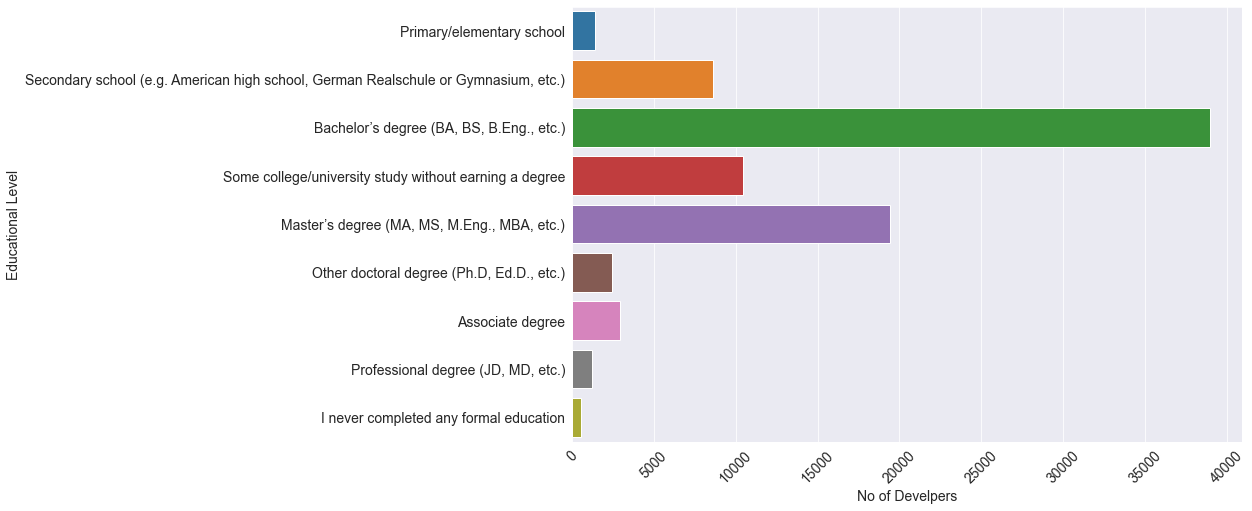

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_col['EdLevel'])

plt.xticks(rotation=45)
plt.xlabel("No of Develpers")
plt.ylabel('Educational Level')
plt.show()

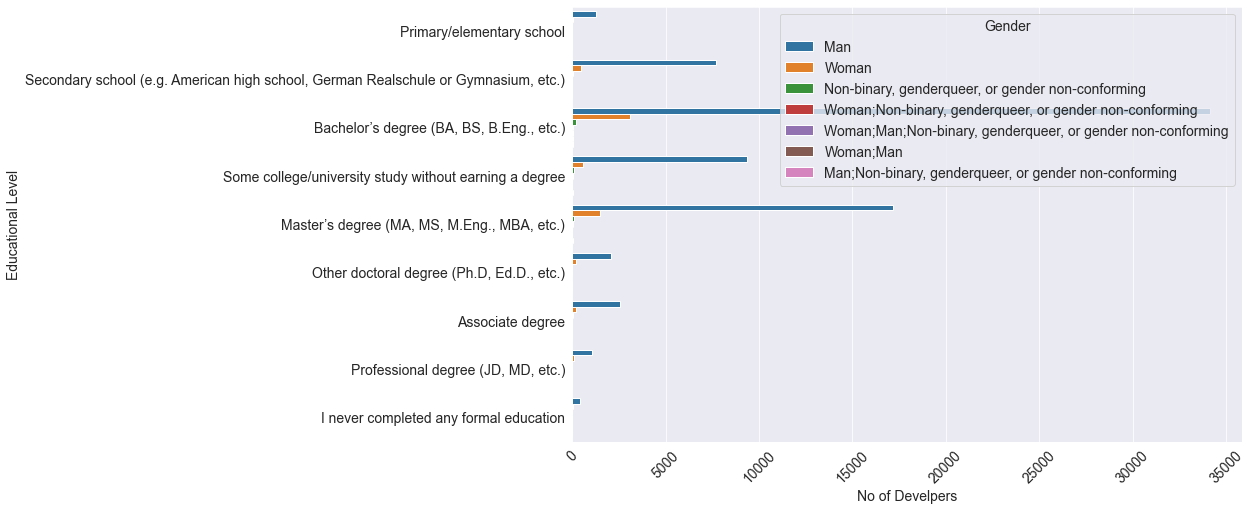

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_col['EdLevel'],hue=df_col['Gender'])

plt.xticks(rotation=45)
plt.xlabel("No of Develpers")
plt.ylabel('Educational Level')
plt.show()

In [41]:
gen=['Man','Woman','Non-binary, genderqueer, or gender non-conforming']
gen_sal=df_col[df_col['Gender'].isin(gen)][['Gender','ConvertedComp']]
gen_sal.dropna(inplace=True)
gen_sal

,Gender,ConvertedComp
2,Man,8820.0
3,Man,61000.0
5,Man,366420.0
8,Man,95179.0
12,Man,90000.0
...,...,...
88325,Man,130000.0
88326,Man,82488.0
88328,Man,68745.0
88329,Man,588012.0


C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


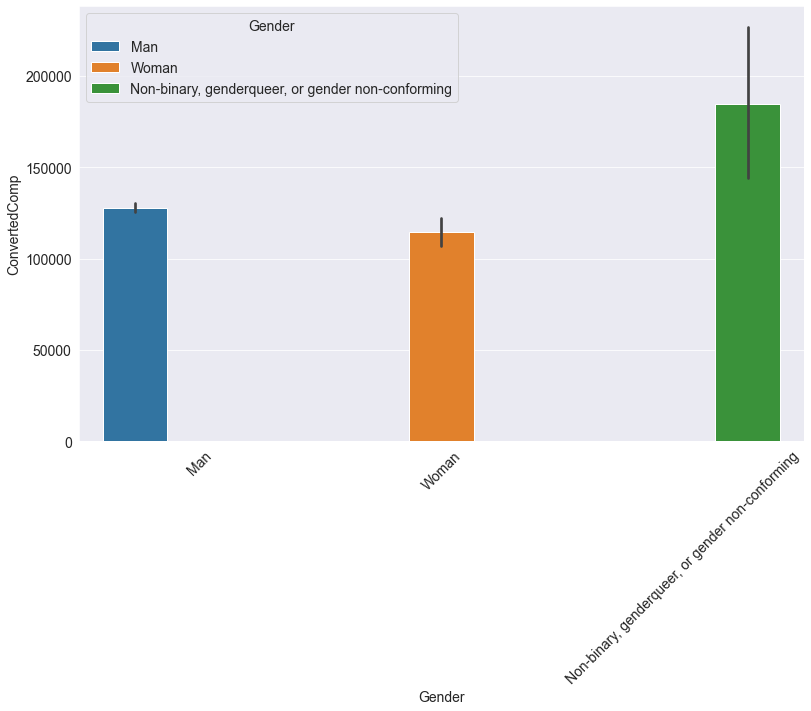

In [42]:
plt.figure(figsize=(13,8))
sns.barplot(gen_sal['Gender'],gen_sal['ConvertedComp'],hue=gen_sal['Gender'])
plt.xticks(rotation=45)
plt.show()

In [43]:
undergra_pct=df_col.UndergradMajor.value_counts()/df_col.UndergradMajor.count()*100
undergra_pct

Computer science, computer engineering, or software engineering          62.408575
Another engineering discipline (ex. civil, electrical, mechanical)        8.235591
Information systems, information technology, or system administration     6.932365
Web development or web design                                             4.520067
A natural science (ex. biology, chemistry, physics)                       4.286018
Mathematics or statistics                                                 3.940264
A business discipline (ex. accounting, finance, marketing)                2.442884
A humanities discipline (ex. literature, history, philosophy)             2.083832
A social science (ex. anthropology, psychology, political science)        1.793931
Fine arts or performing arts (ex. graphic design, music, studio art)      1.637012
I never declared a major                                                  1.292588
A health science (ex. nursing, pharmacy, radiology)                       0.426873
Name

C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Percentage')

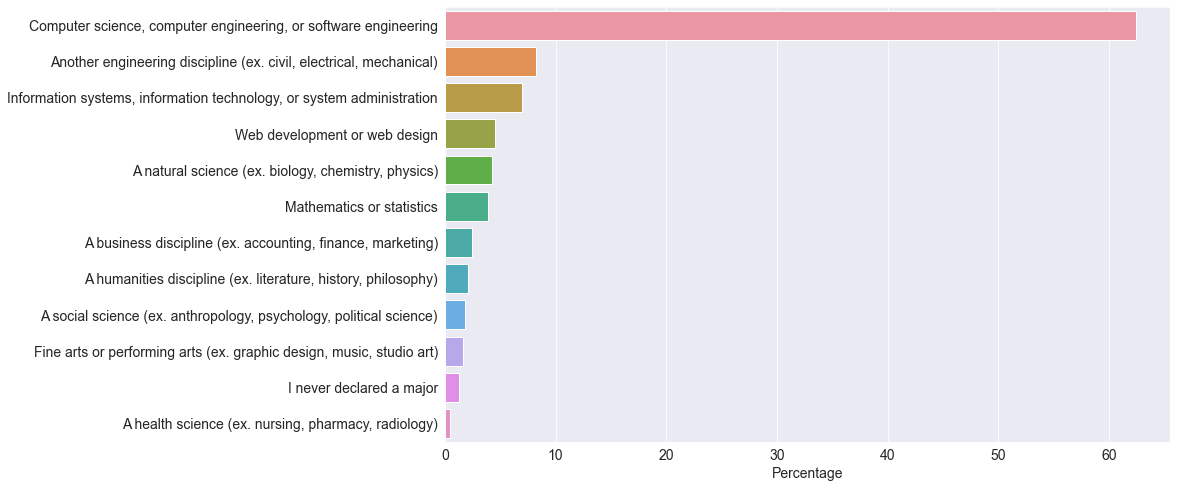

In [44]:
plt.figure(figsize=(13,8))
sns.barplot(undergra_pct,undergra_pct.index)
plt.xlabel('Percentage')

In [45]:
df_col.Student.unique()

array(['No', 'Yes, full-time', nan, 'Yes, part-time'], dtype=object)

In [46]:
df_stu=df_col.Student.value_counts()
df_stu

No                65452
Yes, full-time    15703
Yes, part-time     5382
Name: Student, dtype: int64

C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Student'>

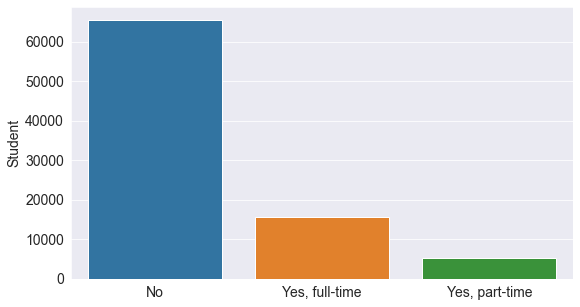

In [47]:
sns.barplot(df_stu.index,df_stu)

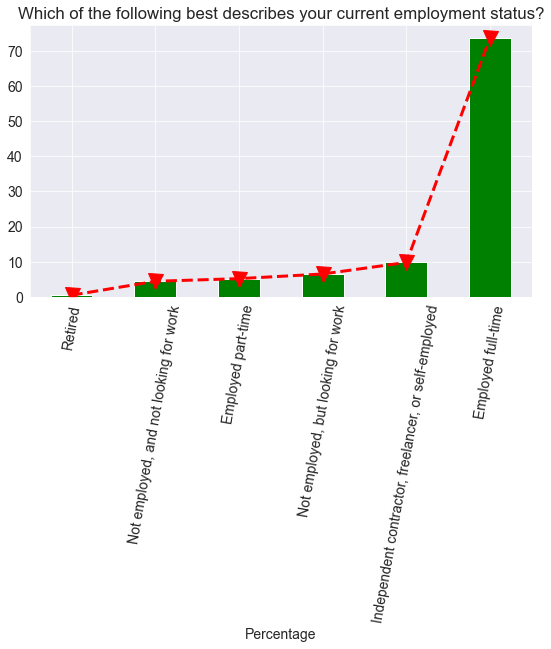

In [48]:
(df_col.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='bar',color='green')
(df_col.Employment.value_counts(normalize=True,ascending=True)*100).plot(c='red',marker='v',markersize=15,linewidth=3,linestyle='--')

plt.title(schema_df.Employment)
plt.xlabel('Percentage')
plt.xticks(rotation=80)
plt.show()

In [49]:
df_col.LanguageWorkedWith.value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                       1471
C#;HTML/CSS;JavaScript;SQL                                                        1406
HTML/CSS;JavaScript                                                               1243
C#;HTML/CSS;JavaScript;SQL;TypeScript                                              981
Java                                                                               928
                                                                                  ... 
C++;C#;Java;Kotlin;Objective-C;Ruby;SQL                                              1
C;C++;C#;Java;JavaScript;Kotlin;SQL                                                  1
Assembly;Bash/Shell/PowerShell;C;C++;Dart;Elixir;HTML/CSS;Java;Python;SQL            1
Bash/Shell/PowerShell;HTML/CSS;Java;Kotlin;PHP;Python;Scala;SQL;TypeScript           1
Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaScript;PHP;SQL;Other(s):       1
Name: LanguageWorkedWith, Length: 20021, dt

In [50]:
lang=df_col.LanguageWorkedWith.str.split(';',expand=True)
lang

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,HTML/CSS,Java,JavaScript,Python,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,C++,HTML/CSS,Python,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,HTML/CSS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,C,C++,C#,Python,SQL,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,C++,HTML/CSS,Java,JavaScript,Python,SQL,VBA,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,HTML/CSS,JavaScript,Other(s):,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
88879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
lang_df=lang.unstack().value_counts()
lang_df

JavaScript               58885
HTML/CSS                 55163
SQL                      47263
Python                   36285
Java                     35705
Bash/Shell/PowerShell    31818
C#                       26935
PHP                      22900
C++                      20427
TypeScript               18396
C                        17933
Other(s):                 7879
Ruby                      7288
Go                        7174
Assembly                  5806
Swift                     5711
Kotlin                    5579
R                         5033
VBA                       4749
Objective-C               4161
Scala                     3285
Rust                      2785
Dart                      1672
Elixir                    1252
Clojure                   1240
WebAssembly               1006
F#                         964
Erlang                     771
dtype: int64

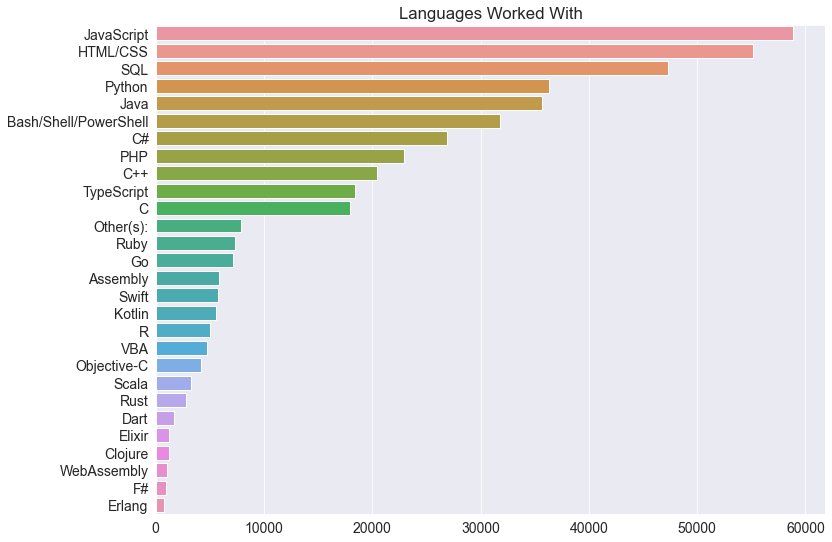

In [52]:
plt.figure(figsize=(12,9))
sns.barplot(y=lang_df.index,x=lang_df)
plt.title('Languages Worked With')
plt.show()

In [53]:
df_col['DevType'].value_counts()


Developer, full-stack                                                                                                                                                                                                                              8394
Developer, back-end                                                                                                                                                                                                                                4885
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                     2384
Developer, front-end                                                                                                                                                                                                                               2202
Develope

In [54]:
dev=df_col.DevType.str.split(';',expand=True)
dev_df=dev.unstack().value_counts()
dev_df

Developer, full-stack                            41961
Developer, back-end                              40400
Developer, front-end                             26483
Developer, desktop or enterprise applications    17192
Developer, mobile                                14596
Student                                          11871
Database administrator                            9459
Designer                                          9132
System administrator                              8867
DevOps specialist                                 8795
Developer, embedded applications or devices       7201
Data scientist or machine learning specialist     6431
Developer, QA or test                             6324
Data or business analyst                          6264
Academic researcher                               5897
Engineer, data                                    5785
Educator                                          4466
Developer, game or graphics                       4411
Engineerin

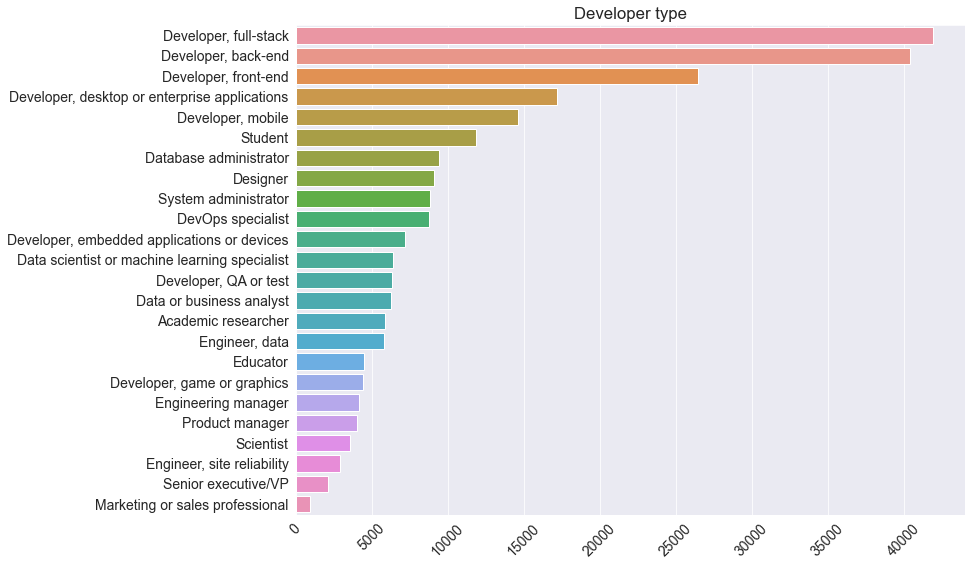

In [55]:
plt.figure(figsize=(12,9))
sns.barplot(x=dev_df,y=dev_df.index)
plt.title('Developer type')
plt.xticks(rotation=45)
plt.show()

In [56]:
df_col.LanguageDesireNextYear.value_counts()

Python                                                                                          1229
HTML/CSS;JavaScript                                                                              693
HTML/CSS;JavaScript;TypeScript                                                                   642
C#                                                                                               600
Java                                                                                             582
                                                                                                ... 
Bash/Shell/PowerShell;C;C++;C#;HTML/CSS;JavaScript;PHP;SQL;Other(s):                               1
Bash/Shell/PowerShell;C;C++;Go;Python;Ruby;Rust;WebAssembly                                        1
Assembly;Bash/Shell/PowerShell;C++;HTML/CSS;Java;Objective-C;PHP;Python;Ruby;SQL;WebAssembly       1
Assembly;C;C++;C#;Go;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;Python;Ruby;SQL;Swift     

In [57]:
lan_next=df_col.LanguageDesireNextYear.str.split(';',expand=True)
lan_next_df=lan_next.unstack().value_counts(ascending=True)
lan_next_df

VBA                       1627
Erlang                    2112
Clojure                   2726
Objective-C               2832
F#                        3496
Elixir                    3771
Dart                      4406
Assembly                  4639
Scala                     5531
R                         6716
Ruby                      7218
Other(s):                 7866
WebAssembly               8398
Swift                     8751
Rust                     10456
C                        11088
PHP                      12766
Kotlin                   13165
C++                      16785
Go                       16977
Bash/Shell/PowerShell    21186
C#                       22309
Java                     23374
TypeScript               23571
SQL                      33383
HTML/CSS                 36451
Python                   39837
JavaScript               44492
dtype: int64

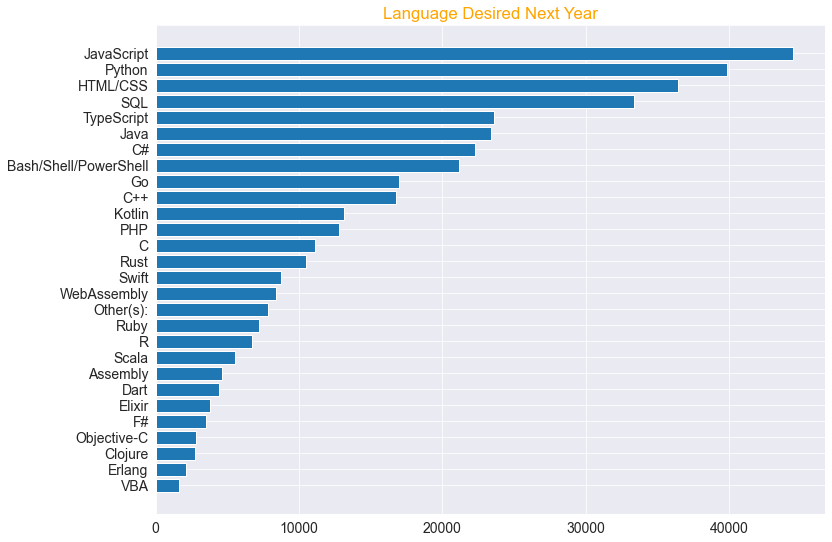

In [58]:
plt.figure(figsize=(12,9))
plt.barh(lan_next_df.index,lan_next_df)
plt.title('Language Desired Next Year',c='orange')

plt.show()

Text(0.5, 1.0, 'Most loved languages')

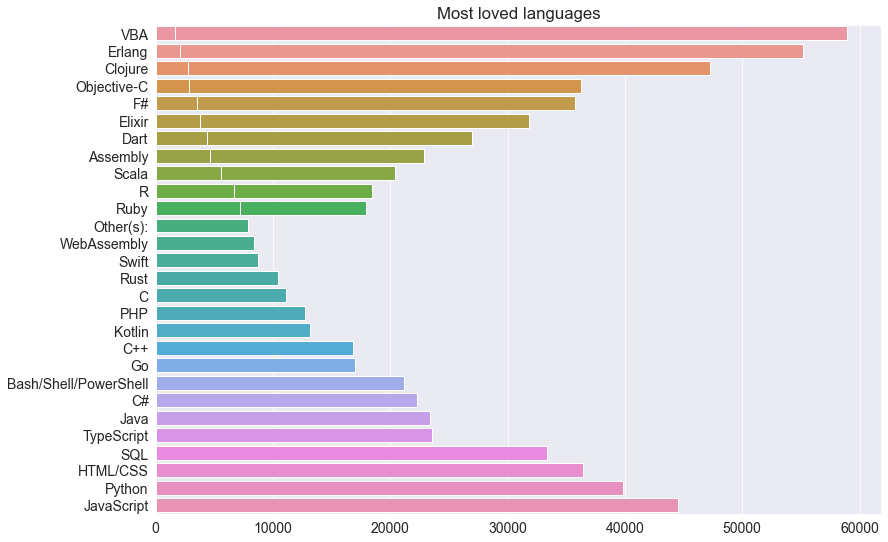

In [59]:
# to show what is the famous language and IS the developers ready to learn next year

fig,ax=plt.subplots(figsize=(13,9))
sns.barplot(x=lang_df,y=lang_df.index,ax=ax)
sns.barplot(x=lan_next_df,y=lan_next_df.index,ax=ax)
ax.set_title("Most loved languages")

In [60]:
country_df=df_col.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)

In [61]:
most_resp_df=country_df.loc[df_col.Country.value_counts()>250].head(15)

In [62]:
country_df

,WorkWeekHrs
Country,
Burundi,68.000000
Sierra Leone,65.000000
Mali,57.500000
Turkmenistan,52.333333
Seychelles,50.000000
...,...
North Korea,NaN
Papua New Guinea,NaN
Saint Kitts and Nevis,NaN


C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='YearsCodePro'>

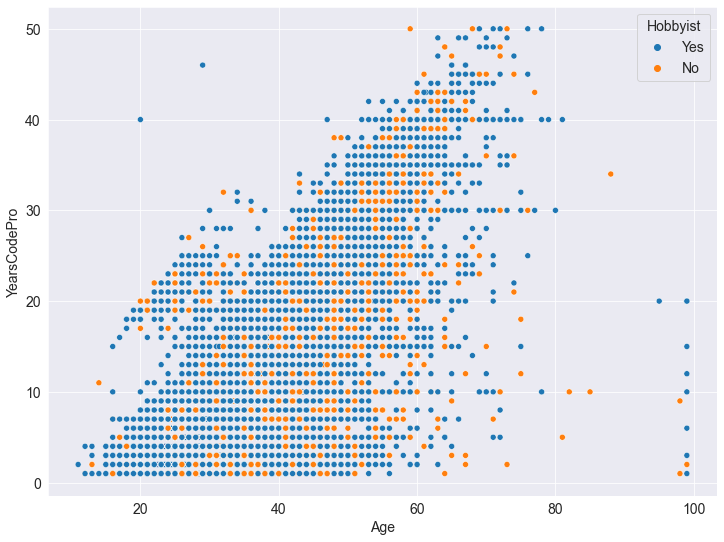

In [63]:
plt.figure(figsize=(12,9))
sns.scatterplot('Age','YearsCodePro',hue='Hobbyist',data=df_col)

C:\Users\usman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age1stCode', ylabel='Density'>

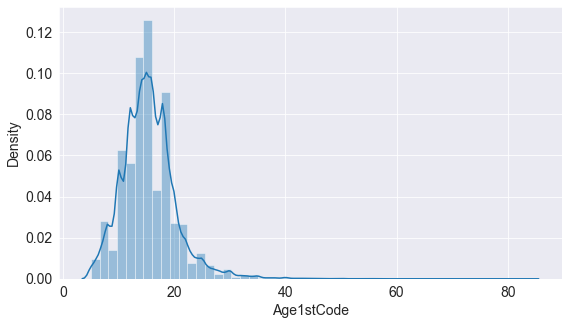

In [64]:
sns.distplot(df_col.Age1stCode)

# Usefull Insights

## 1. You Can start programming at any age
## 2. The more you practice and experience the more you become Pro

In [65]:
corr=df_col.corr()

In [66]:
corr

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp
Age,1.000000,0.104937,0.784437,0.826435,0.095001,0.108819
Age1stCode,0.104937,1.000000,-0.268069,-0.147471,-0.006839,-0.039374
YearsCode,0.784437,-0.268069,1.000000,0.870144,0.083791,0.106271
YearsCodePro,0.826435,-0.147471,0.870144,1.000000,0.085635,0.101641
WorkWeekHrs,0.095001,-0.006839,0.083791,0.085635,1.000000,0.067282
ConvertedComp,0.108819,-0.039374,0.106271,0.101641,0.067282,1.000000


<AxesSubplot:>

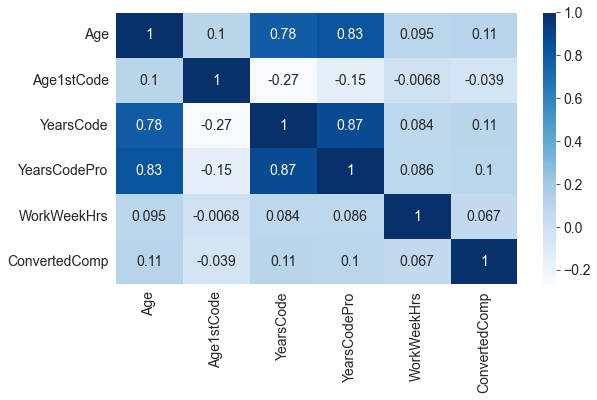

In [67]:
sns.heatmap(corr,annot=True,cmap='Blues')

# This was all about EDA ,if you enjoyed this kindly like and share


## Note: Do your own practice
### Select as much columns as you need for your projects
### Try making different graphs on this dataset









# Lastly my favourite advice: "The more you play with the programming the more you will learn and enjoy".